In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -*- coding: utf-8 -*-
"""Cars_DB.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1vX90dk7RUqXPNgH-kMnnTPhtwSaDCRUs
"""

url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=053cea08-09bc-40ec-8f7a-156f0677aff3'

import requests
import pandas as pd
pd.set_option("display.max_columns", None)

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

data_df = pd.DataFrame(data['result']['records'])

data_df.head()

# Import necessary libraries
from ipywidgets import widgets, VBox, interact, Output
from IPython.display import display
output_area = Output()

# Create widgets
tozeret_nm_dropdown = widgets.Dropdown(
    options=[''] + sorted(data_df['tozeret_nm'].unique().tolist()),
    description='Tozeret:',
    style={'description_width': 'initial'}
)

kinuy_mishari_dropdown = widgets.Dropdown(
    options=[''],
    description='Kinuy Mishari:',
    style={'description_width': 'initial'}
)

# Function to update the second dropdown based on the selection of the first
def update_kinuy_mishari_options(change):
    if change['new']:  # Check if a valid option is selected
        filtered_values = data_df[data_df['tozeret_nm'] == change['new']]['kinuy_mishari'].unique()
        kinuy_mishari_dropdown.options = [''] + sorted(filtered_values)
    else:
        kinuy_mishari_dropdown.options = ['']

# Function to update the output area with the total records and unique 'ramat_gimur' values
def update_output(change=None):
    output_area.clear_output()
    selected_tozeret = tozeret_nm_dropdown.value
    selected_kinuy = kinuy_mishari_dropdown.value

    if selected_tozeret and selected_kinuy:
        filtered_df = data_df[
            (data_df['tozeret_nm'] == selected_tozeret) &
            (data_df['kinuy_mishari'] == selected_kinuy)
        ]
        total_records = len(filtered_df)
        unique_ramat_gimur = filtered_df['ramat_gimur'].unique()

        with output_area:
            print(f"Total Records: {total_records}")
            print(f"Unique Ramat Gimur: {', '.join(unique_ramat_gimur) if len(unique_ramat_gimur) > 0 else 'None'}")
    else:
        with output_area:
            print("Please select valid options for both dropdowns.")

# Observe changes in both dropdowns
tozeret_nm_dropdown.observe(update_kinuy_mishari_options, names='value')
kinuy_mishari_dropdown.observe(update_output, names='value')

# Display widgets and output area
display(VBox([tozeret_nm_dropdown, kinuy_mishari_dropdown, output_area]))



In [ ]:
import matplotlib.pyplot as plt
import json

dictionary = json.load(open('/content/drive/My Drive/3_1.json', 'r'))
xAxis = [key for key, value in dictionary.items()]
yAxis = [value for key, value in dictionary.items()]
plt.grid(True)

## LINE GRAPH ##
plt.plot(xAxis,yAxis, color='#8a5082', marker='o')
plt.xlabel('variable')
plt.ylabel('value')

plt.show()



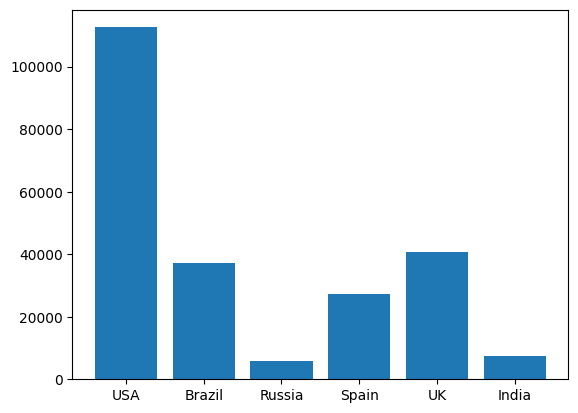

In [ ]:
# Importing the matplotlib library
import matplotlib.pyplot as plt
# Categorical data: Country names
countries = ['USA', 'Brazil', 'Russia', 'Spain', 'UK', 'India']
# Integer value interms of death counts
totalDeaths = [112596, 37312, 5971, 27136, 40597, 7449]
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(countries, totalDeaths)
# Displaying the bar plot
plt.show()

In [ ]:
import pandas as pd
a = [1, 7, 2]
myvar = pd.Series(a)
print(myvar)
print(myvar[0])


0    1
1    7
2    2
dtype: int64
1


In [ ]:
import pandas as pd
calories = {"day1": 420, "day2": 380, "day3": 390}
myvar = pd.Series(calories)
print(myvar)


day1    420
day2    380
day3    390
dtype: int64


In [ ]:
import pandas as pd
data = {
"calories": [420, 380, 390],
"duration": [50, 40, 45]
}

myvar2 = pd.DataFrame(data, index = ["day1", "day2", "day3"])
print(myvar2)


      calories  duration
day1       420        50
day2       380        40
day3       390        45


In [ ]:
import pandas as pd
data = {
"calories": [420, 380, 390],
"duration": [50, 40, 45]
}
df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
print(df)
#refer to the named index:
print(df.loc["day2"])


      calories  duration
day1       420        50
day2       380        40
day3       390        45
calories    380
duration     40
Name: day2, dtype: int64


In [ ]:
import pandas
mydataset = {
 'cars': ["BMW", "Volvo", "Ford"],
 'passings': [3, 7, 2]
}
myvar = pandas.DataFrame(mydataset)
print(myvar)
myvar.to_json("3_2.json")


    cars  passings
0    BMW         3
1  Volvo         7
2   Ford         2


In [ ]:
import pandas as pd
df2 = pd.read_json('/content/drive/My Drive/3_2.json')
print(df2.to_string())

In [ ]:
import pandas as pd

data = {
  "Duration":{
    "0":60,
    "1":60,
    "2":60,
    "3":45,
    "4":45,
    "5":60
  },
  "Pulse":{
    "0":110,
    "1":117,
    "2":103,
    "3":109,
    "4":117,
    "5":102
  },
  "Maxpulse":{
    "0":130,
    "1":145,
    "2":135,
    "3":175,
    "4":148,
    "5":127
  },
  "Calories":{
    "0":409.1,
    "1":479.0,
    "2":340.0,
    "3":282.4,
    "4":406.0,
    "5":300.5
  }
}

df = pd.DataFrame(data)

print(df)


   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
5        60    102       127     300.5


In [ ]:
import pandas as pd
mydataset = {
 'cars': ['BMW','Volvo', 'Ford'],
 'passings': [3,7,2]
}
print(df)
print()
df = pd.DataFrame(mydataset)
print(df[df['passings']>5])
print()
print(df[(df['passings']>5) | (df['cars']=='Ford')])



   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
5        60    102       127     300.5

    cars  passings
1  Volvo         7

    cars  passings
1  Volvo         7
2   Ford         2


In [ ]:
df[df['passings']>5]

In [ ]:
df[(df['passings']>5) | (df['cars']=='Ford')]


In [ ]:
url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=053cea08-09bc-40ec-8f7a-156f0677aff3'
import requests
import pandas as pd
pd.set_option("display.max_columns", None)
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

data_df = pd.DataFrame(data['result']['records'])
#יציג את 5 השורות הראשונות של הנתונים

data_df.head()

,_id,mispar_rechev,tozeret_cd,sug_degem,tozeret_nm,degem_cd,degem_nm,ramat_gimur,ramat_eivzur_betihuty,kvutzat_zihum,shnat_yitzur,degem_manoa,mivchan_acharon_dt,tokef_dt,baalut,misgeret,tzeva_cd,tzeva_rechev,zmig_kidmi,zmig_ahori,sug_delek_nm,horaat_rishum,moed_aliya_lakvish,kinuy_mishari
0,1,60280801,588,P,מזדה יפן,234,GL627,LUXURY,1.0,13.0,2019,PE,2024-06-24,2025-07-09,פרטי,JMZGL6278Z1401863,25,כסף,225/55R17,225/55R17,בנזין,190180.0,2019-7,MAZDA 6
1,2,5847885,885,P,קיה קוריאה,365,CC81CG,EX,1.0,3.0,2017,G4LE,2024-01-29,2025-03-29,פרטי,KNACC81CGH5057178,80,שנהב לבן,205/60R16,205/60R16,בנזין,160524.0,2017-3,NIRO
2,3,3960766,481,P,יונדאי קוריאה,691,BU51B,GLS,NaN,15.0,2008,G4ED,2024-08-02,2025-08-24,פרטי,KMHBU51BP8U764536,20,אפור,175/65R14,175/65R14,בנזין,NaN,2008-8,GETZ
3,4,8143078,845,P,יונדאי טורקיה,1,BB51C,INSPIRE,NaN,14.0,2012,G4FA,2024-08-11,2025-05-01,סוחר,NLHBB51CBCZ121770,33,תכלת,175/70R14,175/70R14,בנזין,NaN,2012-5,I20
4,5,2540473,253,P,יונדאי צ'כיה,41,DC51D,SUPREME,NaN,15.0,2010,G4FC,2024-07-11,2025-06-29,סוחר,TMADC51DBBJ129183,87,בז מטאלי,205/55R16,205/55R16,בנזין,NaN,2010-6,I30


In [ ]:
url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=053cea08-09bc-40ec-8f7a-156f0677aff3'
Tozeret = "" # @param [""]
Kinuy_Mishari = "" # @param [""]

import requests
import pandas as pd
pd.set_option("display.max_columns", None)
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)


# Create a DataFrame from the 'records' in the JSON response
data_df = pd.DataFrame(data['result']['records'])

# Set Tozeret with the 'tozeret_nm' column values
print (data_df['tozeret_nm'].tolist())




['מזדה יפן', 'קיה קוריאה', 'יונדאי קוריאה', 'יונדאי טורקיה', "יונדאי צ'כיה", 'קיה קוריאה', 'מזדה תאילנד', 'מרצדס בנץ ארהב', 'טויוטה יפן', 'מזדה יפן', 'קיה קוריאה', 'יונדאי קוריאה', 'הונדה-יפן', 'קיה קוריאה', 'מיצובישי יפן', 'קיה קוריאה', 'מזדה יפן', 'יונדאי קוריאה', 'סוזוקי הונגריה', 'יונדאי קוריאה', 'שברולט ד.קוריא', 'קיה קוריאה', 'יונדאי טורקיה', 'שברולט ד.קוריא', 'קיה קוריאה', 'סוזוקי-יפן', 'קיה סלובקיה', 'קיה קוריאה', 'קיה קוריאה', 'מזדה יפן', 'יונדאי קוריאה', 'קיה סלובקיה', 'מזדה יפן', 'קיה סלובקיה', 'טויוטה אנגליה', "יונדאי צ'כיה", 'יונדאי קוריאה', 'מזדה יפן', "סקודה צ'כיה", 'סוזוקי הונגריה', "פיג'ו צרפת", 'טויוטה יפן', 'יונדאי טורקיה', 'מרוטי-סוזוקי', 'לקסוס יפן', 'רנו טורקיה', 'קיה קוריאה', 'פולקסווגן מכסי', 'אלפא רומיאו', 'וולבו בלגיה', 'טויוטה יפן', 'מזדה יפן', 'מרצדס בנץ גרמנ', 'פולקסווגן מכסי', 'טויוטה טורקיה', 'פורד גרמניה', 'פולקסווגן מכסי', 'מזדה תאילנד', 'יונדאי טורקיה', 'טויוטה אנגליה', 'טויוטה יפן', 'קיה קוריאה', 'קיה קוריאה', "סקודה צ'כיה", 'יונדאי קוריאה', 'יונדאי ט